# Human Activity Recognition with Smartphone

**By:** Yazan Alhroob

In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

In [ ]:
# !unzip human-activity-recognition-with-smartphones.zip

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Training dataset Analysis and Plotting

In [ ]:
Train_DF = pd.read_csv('train.csv')

In [ ]:
# Train_DF.info(verbose=True, null_counts=True)

In [ ]:
Train_DF

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.9932

In [ ]:
Train_DF.shape

(7352, 563)

In [ ]:
Train_DF.isnull().sum().sum()

0

**So** there is no NA values in the data

In [ ]:
Train_DF.select_dtypes(exclude=["number"])

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
7347,WALKING_UPSTAIRS
7348,WALKING_UPSTAIRS
7349,WALKING_UPSTAIRS
7350,WALKING_UPSTAIRS


In [ ]:
Train_DF['Activity'].unique().tolist()

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

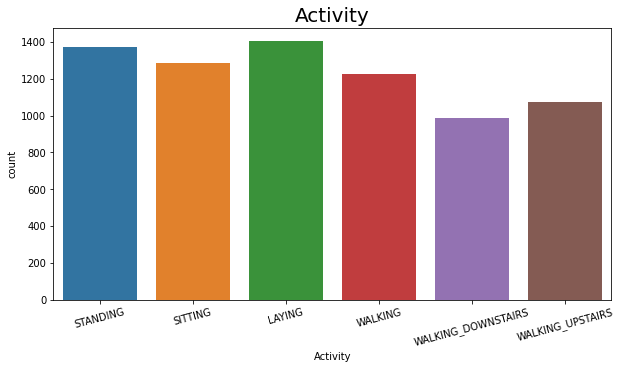

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=Train_DF, x='Activity',palette='tab10')
plt.title('Activity',fontsize=20)
plt.xticks(rotation=15, ha='center');

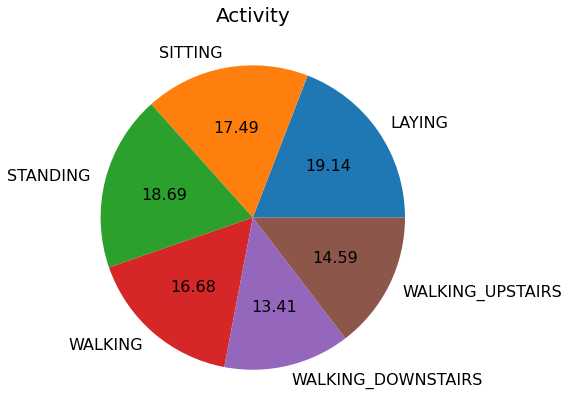

In [ ]:
plt.figure(figsize=(10,7))
Train_DF.groupby('Activity').size().plot.pie(autopct='%.2f', textprops={'fontsize': 16})
plt.title('Activity',fontsize=20)
plt.ylabel('');

In [ ]:
Train_DF.subject.unique().tolist()

[1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30]

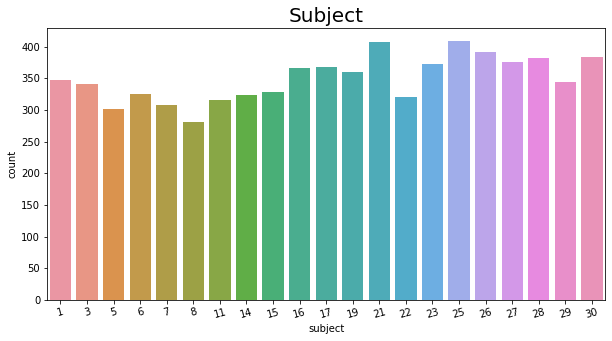

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=Train_DF, x='subject')
plt.title('Subject',fontsize=20)
plt.xticks(rotation=15, ha='center');

## Testing dataset Analysis and Plotting

In [ ]:
Test_DF = pd.read_csv('test.csv')

In [ ]:
Test_DF

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [ ]:
Test_DF.shape

(2947, 563)

In [ ]:
Test_DF.isnull().sum().sum()

0

**So** there is no NA values in the data

In [ ]:
Test_DF.select_dtypes(exclude=["number"])

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
2942,WALKING_UPSTAIRS
2943,WALKING_UPSTAIRS
2944,WALKING_UPSTAIRS
2945,WALKING_UPSTAIRS


In [ ]:
Test_DF['Activity'].unique().tolist()

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

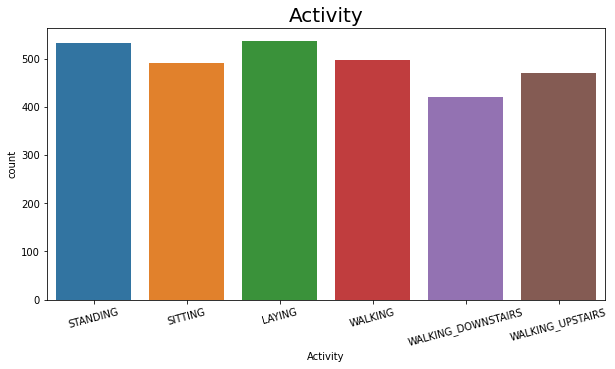

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=Test_DF, x='Activity',palette='tab10')
plt.title('Activity',fontsize=20)
plt.xticks(rotation=15, ha='center');

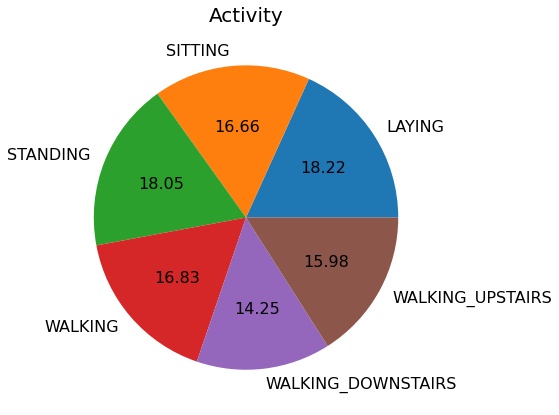

In [ ]:
plt.figure(figsize=(10,7))
Test_DF.groupby('Activity').size().plot.pie(autopct='%.2f', textprops={'fontsize': 16})
plt.title('Activity',fontsize=20)
plt.ylabel('');

In [ ]:
Test_DF.subject.unique().tolist()

[2, 4, 9, 10, 12, 13, 18, 20, 24]

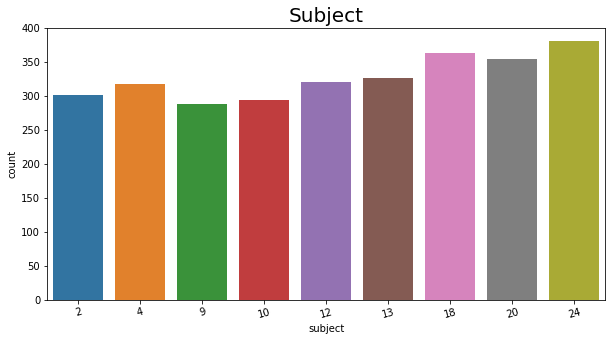

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=Test_DF, x='subject')
plt.title('Subject',fontsize=20)
plt.xticks(rotation=15, ha='center');

In [ ]:
X_train = Train_DF.iloc[:,:-2]
y_train = Train_DF['Activity']
X_test = Test_DF.iloc[:,:-2]
y_test = Test_DF['Activity']

## SGDClassifier

In [ ]:
sgdc = SGDClassifier(alpha=0.0001)
sgdc.fit(X_train, y_train)
sgdc_predictions = sgdc.predict(X_test)
# print(roc_auc_score(y_test, predictions,multi_class='ovo'))
print(classification_report(y_test, sgdc_predictions))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.83      0.90       491
          STANDING       0.87      0.98      0.92       532
           WALKING       0.92      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.90      0.94       420
  WALKING_UPSTAIRS       0.93      0.95      0.94       471

          accuracy                           0.94      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.94      0.94      2947



In [ ]:
sgdc_CM = confusion_matrix(y_test, sgdc_predictions)
sgdc_CM_DF = pd.DataFrame(sgdc_CM, columns=np.unique(y_test), index = np.unique(y_test))
sgdc_CM_DF.index.name = 'Actual'
sgdc_CM_DF.columns.name = 'Predicted'

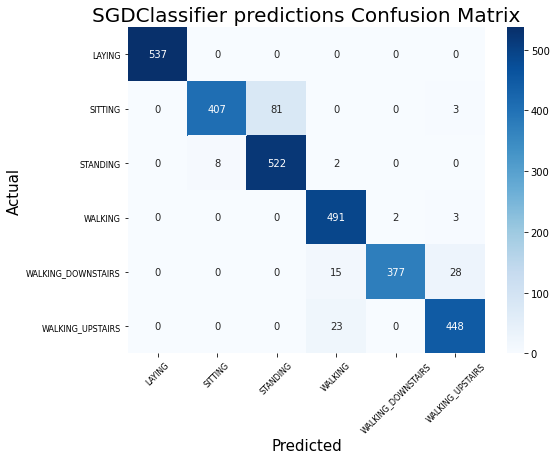

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(sgdc_CM_DF, fmt='g', annot=True, cmap='Blues')
plt.title('SGDClassifier predictions Confusion Matrix',fontsize=20)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(rotation=45,ha='center',fontsize=8)
plt.yticks(fontsize=8);

## LinearSVC

In [ ]:
lsvc = LinearSVC(C=100)
lsvc.fit(X_train, y_train)
lsvc_predictions = lsvc.predict(X_test)
print(classification_report(y_test, lsvc_predictions))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
lsvc_CM = confusion_matrix(y_test, lsvc_predictions)
lsvc_CM_DF = pd.DataFrame(lsvc_CM, columns=np.unique(y_test), index = np.unique(y_test))
lsvc_CM_DF.index.name = 'Actual'
lsvc_CM_DF.columns.name = 'Predicted'

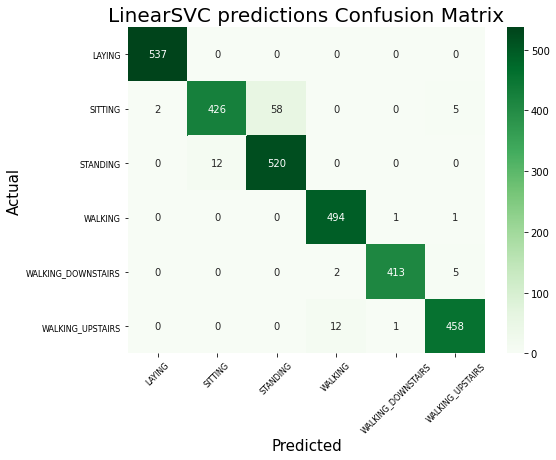

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(lsvc_CM_DF, fmt='g', annot=True, cmap='Greens')
plt.title('LinearSVC predictions Confusion Matrix',fontsize=20)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(rotation=45,ha='center',fontsize=8)
plt.yticks(fontsize=8);

## SVC

In [ ]:
svc = SVC(C=100)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
print(classification_report(y_test, svc_predictions))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.96       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
svc_CM = confusion_matrix(y_test, svc_predictions)
svc_CM_DF = pd.DataFrame(svc_CM, columns=np.unique(y_test), index = np.unique(y_test))
svc_CM_DF.index.name = 'Actual'
svc_CM_DF.columns.name = 'Predicted'

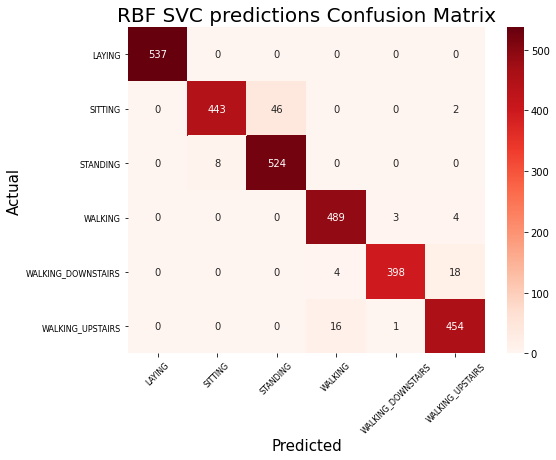

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(svc_CM_DF, fmt='g', annot=True, cmap='Reds')
plt.title('RBF SVC predictions Confusion Matrix',fontsize=20)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(rotation=45,ha='center',fontsize=8)
plt.yticks(fontsize=8);